<a href="https://colab.research.google.com/github/SilahicAmil/End-To-End-Time-Series-Forcasting/blob/main/Time_Series_Forecasting_BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series forecasting fundamentals with TensorFlow

Links:
* All Resources: https://github.com/mrdbourke/tensorflow-deep-learning
 

## Get Data

Hisotrical price data of Bitcoin from CoinDesk

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-07-21 18:23:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-07-21 18:23:59 (7.43 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series data with Pandas

In [2]:
import pandas as pd
df= pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                parse_dates=["Date"],
                index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
df["Closing Price (USD)"].dtype
# df["Date"].dtype()
# df["Currency"].dtype

dtype('float64')

In [5]:
len(df)

2787

Collecting the historical price of Bitcoin over the past ~8 years yielded 2787 samples.

Typically deep learning likes and yields better results with more data.

>Seasonality of a time series dataset refers to the number of samples per year. For the dataset here the seasonality value is 365. Meaning we collect one sample per day for 365 days of the year

In [6]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [7]:
# Only having date and closing price
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


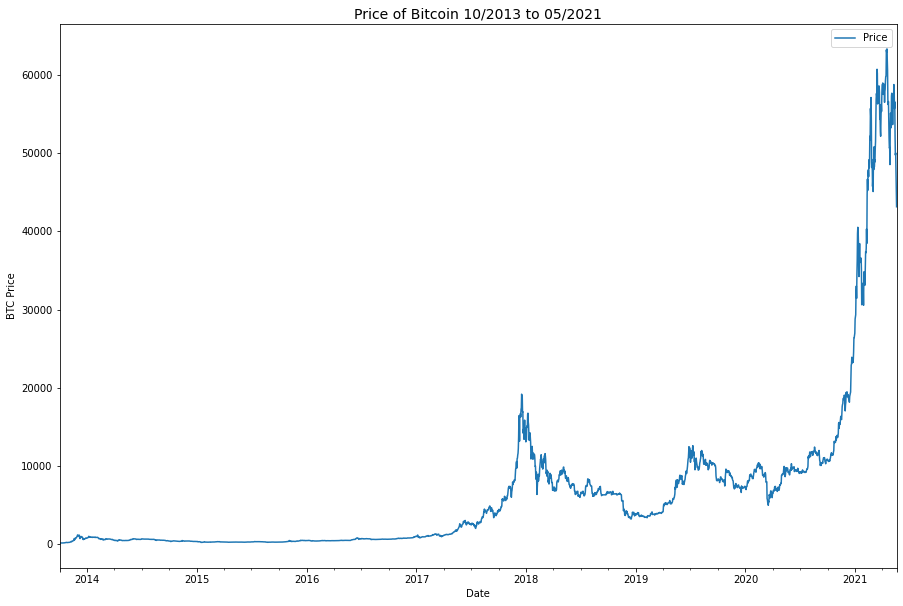

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(15,10))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin 10/2013 to 05/2021", fontsize=14);

## Importing time series data with Pythn's CSV Module

In [9]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #Skips header
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # Gets dates as dates
    btc_price.append(float(line[2]))

# View first 10
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

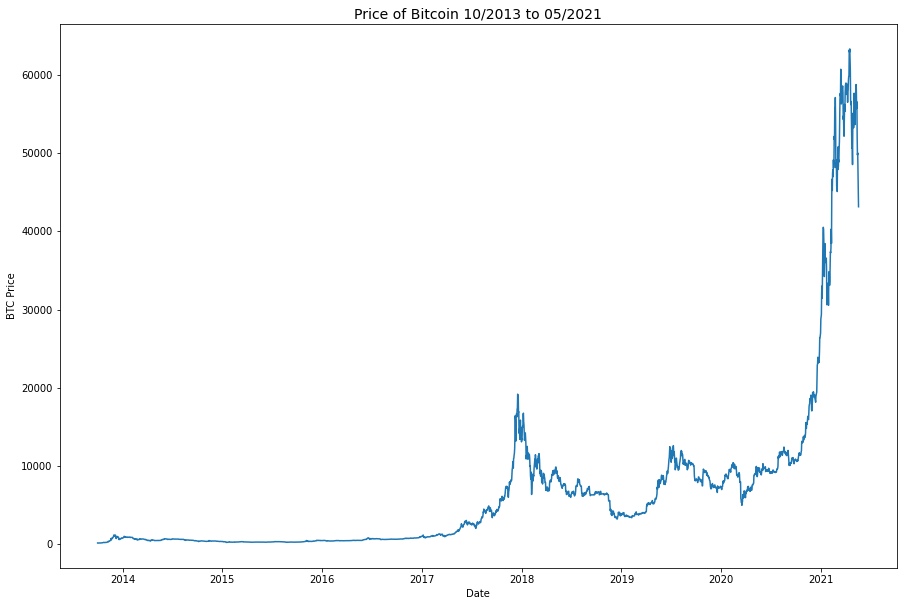

In [10]:
# plot from csv
import numpy as np
plt.figure(figsize=(15,10))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin 10/2013 to 05/2021", fontsize=14);

## Create Train/Test Split 

In [11]:

# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

In [13]:
# Create train and test splits for time series data
split_size = int(0.8 * len(prices)) 

# Train data splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Test data splits
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

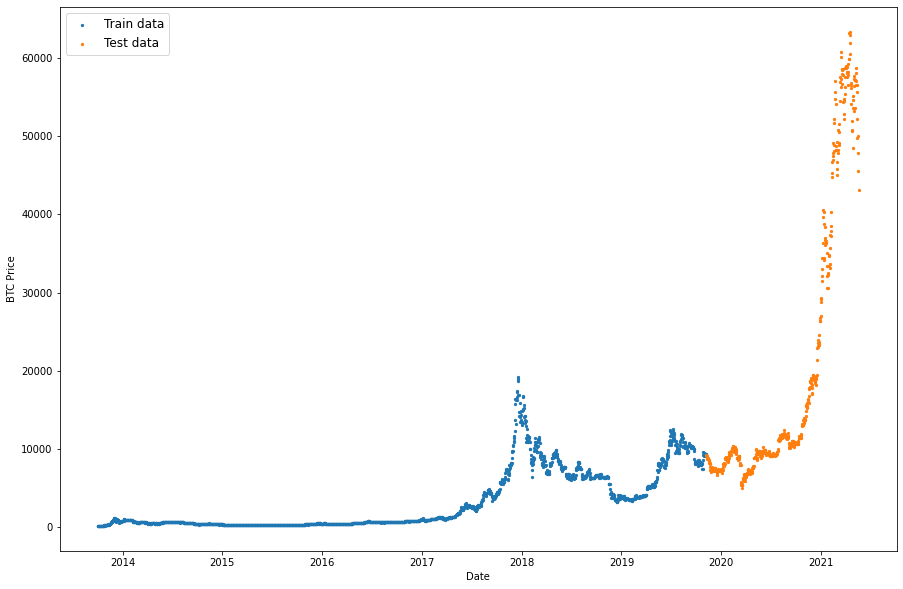

In [14]:
# Plot the splits
plt.figure(figsize=(15,10))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=12)
plt.show();

## Create a plotting function


In [15]:
# Plotting function

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (series of points in times)

  Params
  -------
  timesteps: array of timestep values
  values: array of values across time
  foramt: style of plot defaults scatter
  start: where to start the plot
  end: where to end the plot
  label: label to show plot values
  """
  # Plot series
  # plt.figure(figsize=(10,7))
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid=True

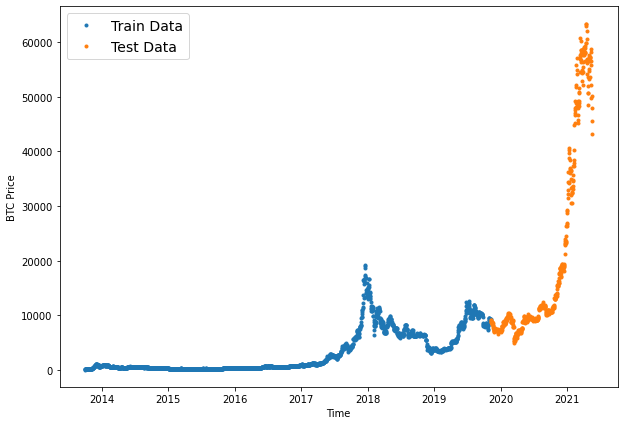

In [16]:
# Test out func
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")

## Modelling Experiment

We've got sme BTC historical data for modelling. Time to run a series of modelling experiments to see which performs best

Common terms:
* Horizon = number of timesteps into the future were going to predict
* Window Size = number of timesteps we're going to use to predict horizon

Modeling experiments

Model Number	Model Type	Horizon size	Window size	Extra data
* 0	Naïve model (baseline)
* 1	Dense model	Horizon=1,	Window Size=7	
* 2	Same as Horizon=1, Window Size=30	
* 3	Same as Horizon=1, Window Size=30
* 4	Conv1D	Horizon=1, Window Size=7
* 5	LSTM	Horizon=1,	 Window Size=7	
* 6	Same as 1 (but with multivariate data)	Horizon=1,	Window Size=7	- Extra Data: Block Reward Size
* 7	N-BEATs Algorithm	Horizon=1,	Window Size=7	
* 8	Ensemble (multiple models optimized on different loss functions)	Horizon=1	Window Size=7	
* 9	Future prediction model (model to predict future values)	Horizon=1,	Window Size=7	
* 10	Same as 1 (but with turkey 🦃 data introduced) Horizon=1,	Window Size=7	

## Model 0: Baseline Forecast

In [17]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

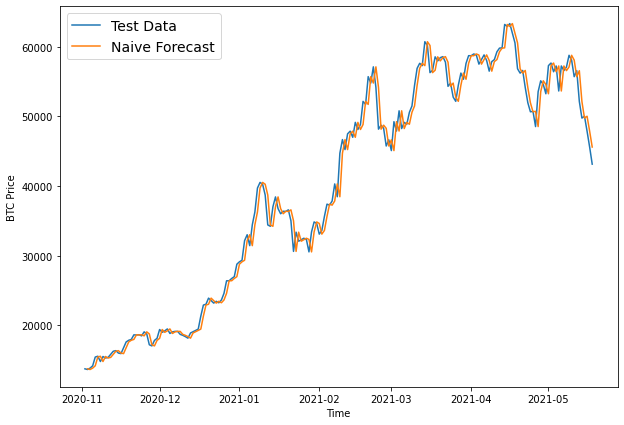

In [26]:
# Plot naive forecast
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, start=360, format="-", label="Test Data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=360, format="-", label="Naive Forecast")

## Evaluating a time series model

Looking into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number. So that means it is a regression problem.


Because we're working on a regression problem, we'll  regression metrics.

Regression Metrics:
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**.

The main evaluation we are doing is: *how does our models forecast `(y_pred)` compare against the actual values `(y_true)`


In [27]:
import tensorflow as tf

In [28]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assumes no seasonality)
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast 
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # Seasonality is 1 day. Reason for the shift of 1

  return mae / mae_naive_no_season

In [30]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624